# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

I will develop  a prediction model to estimate the used car prices looking at the different features such as mileage, age, make , model, and maybe condition or any other features found in the data set. I will take on a regression analysis to quantify the relationship between certain features selected and the price to try and determine what most influences and a coefficient evaluation. The end state will be a model that predicts prices highlighting key drivers for the dealership ownerships.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Steps to understand the data and obtain a better business understanding

1) Ingest the data and review it
2) Identify any missing values
3) Identify any duplicate values
4) Identify any outliers or wrong types of data
5) Determine what features at first glance might influence cost
6) Correlating at first glance how the features could influence cost
7) Format of data like time or numerical
8) EDA - install Automated EDA to help with understanding data

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#Automated EDA
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c5546e311e1be8b26555708a8c3c30c2841ae4a23e5ee9cc04a72ccb444eafaf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
data = pd.read_csv('Data/vehicles.csv')

In [ ]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
data.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [ ]:
data.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:23<00:00,  1.28s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Display results of profile
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Check for missing values
print(data.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [ ]:
#check for duplicate data
data[data.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [ ]:
# Dropping these columns `id`, `region`, `state`, `VIN`, and `size` as they are
#irrelevant to this use case
data = data.drop(['id', 'region', 'state', 'VIN', 'size'], axis=1)

In [ ]:
data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver


In [ ]:
# Outlier Price needs to be fixed, too high so will limit to say $100,000.
# Thinking modestly here and assuming not high-end luxury dealership.
data = data[(data['price'] > 0) & (data['price'] <= 100000)]

In [ ]:
data.describe()

,price,year,odometer
count,393330.000000,392158.000000,3.910470e+05
mean,18717.949803,2011.009323,9.877972e+04
std,14528.246722,9.609518,2.053463e+05
min,1.000000,1900.000000,0.000000e+00
25%,7000.000000,2008.000000,3.809000e+04
50%,15000.000000,2013.000000,8.702000e+04
75%,27590.000000,2017.000000,1.354130e+05
max,100000.000000,2022.000000,1.000000e+07


In [ ]:
data.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver
426879,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,coupe,NaN


In [ ]:
# limiting odometer to 500,000 miles, anything above that is too old
data = data[(data['odometer'] > 0) & (data['odometer'] <= 500000)]

In [ ]:
data.describe()

,price,year,odometer
count,388723.000000,387626.000000,388723.000000
mean,18743.765838,2011.073014,92729.064720
std,14511.420398,9.456878,64026.202926
min,1.000000,1900.000000,1.000000
25%,7188.000000,2008.000000,38392.500000
50%,15200.000000,2013.000000,87000.000000
75%,27590.000000,2017.000000,135000.000000
max,100000.000000,2022.000000,500000.000000


In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [ ]:
# Remove cars before 1950 , old cars high mileage and since it was capped to
#100K , makes sense to take out
data = data[data['year'] >= 1950]

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [ ]:
# Missing value, impute on `year` and `odometer` with median
#for outliers
data['year'].fillna(data['year'].median(), inplace=True)
data['odometer'].fillna(data['odometer'].median(), inplace=True)

In [ ]:
#Categorical data, let's impute using mode for data consistency or put 'unknown'
for col in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
            'transmission', 'drive', 'type', 'paint_color', 'title_status']:
    data[col].fillna(data[col].mode()[0] if data[col].mode().size > 0 else 'unknown', inplace=True)

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [ ]:
data.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver
426879,30590,2019.0,bmw,4 series 430i gran coupe,good,6 cylinders,gas,22716.0,clean,other,rwd,coupe,white


In [ ]:
#Checking for unknown values
unknown_values = data[
    (data['manufacturer'] == 'unknown') |
    (data['model'] == 'unknown') |
    (data['condition'] == 'unknown') |
    (data['cylinders'] == 'unknown') |
    (data['fuel'] == 'unknown') |
    (data['transmission'] == 'unknown') |
    (data['drive'] == 'unknown') |
    (data['type'] == 'unknown') |
    (data['paint_color'] == 'unknown') |
    (data['title_status'] == 'unknown')
]

display(unknown_values.head())

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
57276,1200,2003.0,ford,unknown,excellent,other,other,1.0,clean,other,4wd,sedan,black
384009,1000,1977.0,ford,unknown,fair,4 cylinders,gas,55000.0,missing,manual,rwd,pickup,green


In [ ]:
# Lets do some feature engineering and create age from year (2025 - year)
data['age'] = 2025 - data['year']

In [ ]:
# Let's drop year with age - high correlation
data = data.drop('year', axis=1)

In [ ]:
#Dropping model due to high cardinality in y-data profile
data = data.drop('model', axis=1)

In [ ]:
# Log tranformation on price and odometer to reduce skewness in data as
# mentioned above
data['log_price'] = np.log1p(data['price'])  # log1p handles zeros
data['log_odometer'] = np.log1p(data['odometer'])

In [ ]:
# Let's drop the original price and odometer and implement log trans
#from above
data = data.drop(['price', 'odometer'], axis=1)

In [ ]:
# Group uncommond manufactures into "other", just picking 1%
manufacturer_counts = data['manufacturer'].value_counts()
rare_manufacturers = manufacturer_counts[manufacturer_counts / len(data) < 0.01].index
data['manufacturer'] = data['manufacturer'].apply(lambda x: x if x not in rare_manufacturers else 'other')

In [ ]:
# Convert categorical variables to dummy variables
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel',
                    'transmission', 'drive', 'type', 'paint_color', 'title_status']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Overview of the Dataset and findings

1) The target varaiable will be price and it's a good format, numeric and will be applied to regression models
2) There are some great features like year, manufacturer, drive, condition that can help determine what drives price of car.
3) Missing Values across cells is 15.8%. There are also some variables with high missing count like cylinders 41.6%, condition 40.8%, drive 30.6%), Paint color 40.5%.
4) Duplicate rows: Calculated using two methods since I didn't feel it was accurate, but it turns out NO Duplicate rows.
5) High Correlations exist which may be dropped but further analysis will need to be done. ex. year , odometer which can be important.

In summary, there are lots of missing data and skewed distributions which will need to be prepared before modeling. The the high correlations will require some transformations so the models can be trained and not overfit.



Creating plots to see if we can find any relationships

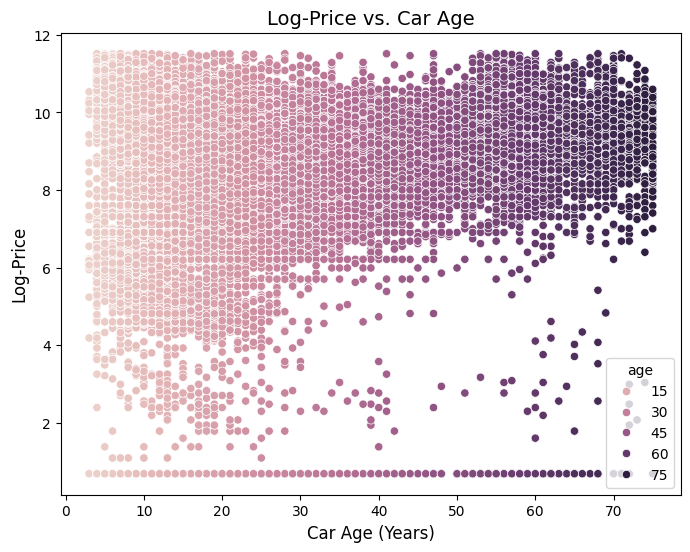

In [ ]:
# Scatter plot of log_price vs. age (adding color)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='log_price', data=data, hue='age')
plt.title('Log-Price vs. Car Age', fontsize=14)
plt.xlabel('Car Age (Years)', fontsize=12)
plt.ylabel('Log-Price', fontsize=12)
plt.show()

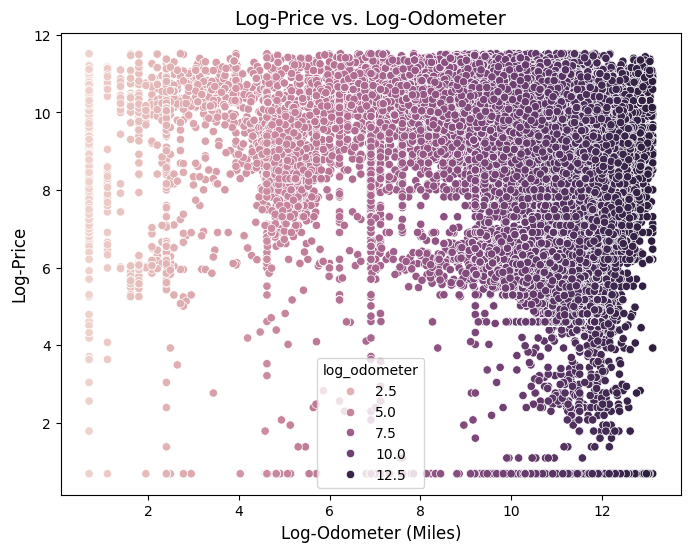

In [ ]:
# Scatter plot of log_price vs. log_odometer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_odometer', y='log_price', data=data, hue='log_odometer')
plt.title('Log-Price vs. Log-Odometer', fontsize=14)
plt.xlabel('Log-Odometer (Miles)', fontsize=12)
plt.ylabel('Log-Price', fontsize=12)
plt.show()

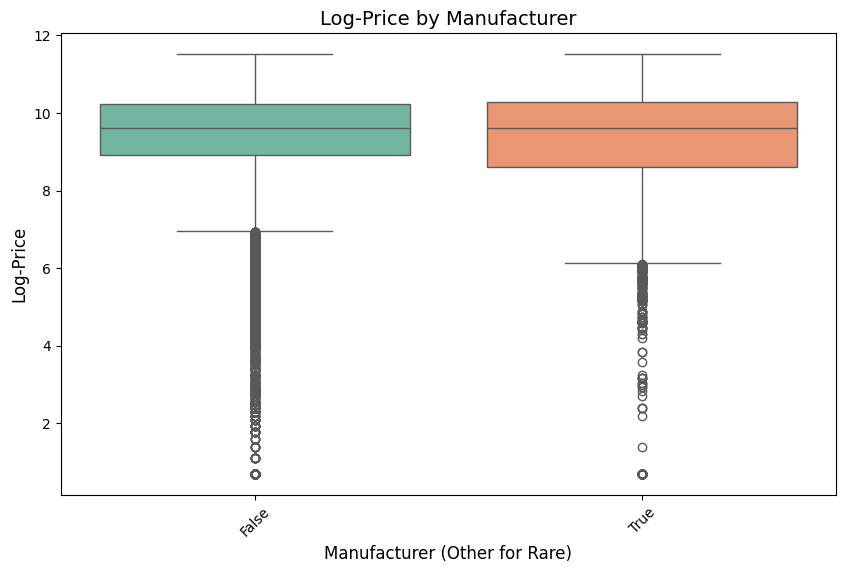

In [ ]:
# Box plot of log_price by manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer_other', y='log_price', data=data, palette='Set2')
plt.title('Log-Price by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer (Other for Rare)', fontsize=12)
plt.ylabel('Log-Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

For this part, I'm going to use LinearRegression, Ridge, and Lasso with cross-validation and grid search functions to predict log_price.

In [ ]:
# Focusing on features and target price
X = data.drop('log_price', axis=1)
y = data['log_price']

In [ ]:
#Spliting data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using the Linear Regression model first
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Using Ridge Regression and Grid Search function
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_test)

In [ ]:
# Using Lasso Regression and Grid Search
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
param_grid = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1]}
grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)
y_pred_lasso = grid_lasso.predict(X_test)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluating Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr)**0.5
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Eval Linear Regression: {rmse_lr:.4f}, R²: {r2_lr:.4f}")


Eval Linear Regression: 1.0403, R²: 0.2644


In [ ]:
#Evaluating Ridge Regression
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)**0.5
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Eval Ridge Regression: {grid_ridge.best_params_['ridge__alpha']}, RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.4f}")

Eval Ridge Regression: 10.0, RMSE: 1.0403, R²: 0.2644


In [ ]:
#Evaluating Lasso Regression
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)**0.5
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Eval Lasso Regression: {grid_lasso.best_params_['lasso__alpha']}, RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.4f}")

Eval Lasso Regression: 0.0001, RMSE: 1.0404, R²: 0.2644


In [ ]:
# Going to use Lasso for selection on features, looking at coef's
lasso_best = grid_lasso.best_estimator_.named_steps['lasso']
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_best.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 5 Features detailed by Lasso Coef:")
print(coef_df.head(5))



Top 5 Features detailed by Lasso Coef:
                  Feature  Coefficient
35  cylinders_6 cylinders     0.524707
36  cylinders_8 cylinders     0.463758
33  cylinders_4 cylinders     0.325195
0                     age    -0.318858
39               fuel_gas    -0.235479


Coefficient analysis, strongest relationship definition:
1) 6_Cylinders having higher price 0.52
2) 8_Cylinders having 2nd higher price 0.46
3) 4_Cylinders having 3rd higher price 0.32
4) Age being negative -0.31, expected as car is older, price is less
5) Fuel type gas -0.23 , less price also expected compared to say electric

Model Results

*   Linear Regression: Moderate performance but sensitive to multicollinearity (high correlation)

*   Ridge Regression: More stable due to regularization in finding best alpha using grid search

*   Lasso Regression: Best for feature selection and eliminated unimportant features by shrinking their coefficients to zero

Best Performing Model
* Lasso Regression had the lowest RMSE (RMSE: 1.0404) and highest R² (R²: 0.2644), making it the most effective at predicting prices


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

*** Key Drivers of Used Car Prices ***
My analysis uncovered several important drivers that impact the price of used cars. Here is the detailed review:

Car Age: Newer vehicles are associated with higher prices. As a car gets older, its value drops as expected. This is shown in both the data analysis and the visual analysis.

Mileage: Cars with lower mileage are more valuable. There's a strong relationship between fewer miles and higher prices.

Manufacturer: Brands like Toyota and Honda, consistently sell for higher prices compared to others. This was evident in both the data summaries and box plots.

Vehicle Types: SUVs and pickups generally sell at higher prices than sedans or compacts. This trend is supported by the model results and visuals.

Condition: Cars labeled as “excellent” or “good” condition typically sell for more money. This was a trending observation.

*** Actionable Insights for Dealerships ****
Key takeaways that can help fine-tune inventory and pricing strategies moving forward.

For Buyers:
Focus on acquiring newer vehicles with lower mileage to inventory. These are in higher demand and can justify higher resale prices. Also, be prepared to pay more for high-demand brands like Toyota, Honda, or a body type like SUVs.

For Sellers:
Marketing a vehicle, I would recommend emphasizing the low mileage, a recent model year, or maybe good condition to attract higher bids.

For Dealerships:
Invest more in popular brands and body types — especially SUVs and pickups.Well-maintained cars are more likely to have better prices as condition adds value. Let data on age, mileage, and brand guide your pricing strategy to stay competitive and profitable.



In [ ]:
# Saving the cleaned up dataset
data.to_csv('Data/purified_vehicles.csv', index=False)